Data Mining: Basic Concepts - WS'21/22
---------------
``` 
> University of Konstanz 
> Department of Computer and Information Science
> Prof. Dr. Daniel Keim, Eren Cakmak, Fabian Sperrle
```
__Organize in teams of 2 people, return the exercise by Thu, Dec 16th, 2021 (11:59 PM) using ILIAS__

---

Assignment 05 in Python
---------------
- ___Please put your names and student IDs here___:
    - Viet Ha, 01/1143223
    - Zheng Zhou, 01/770880

---

#### Exercise 1: Bayesian Networks

The goal of this task is to find Bayesian network structures that fit best some of the Titanic passenger survival dataset.
The data provides information on the fate of passengers on the "Titanic", with features such as economic status (class), sex, age and survival. The data was discretized in order to let you only deal with discrete variables.

##### __(a) Load the dataset and use the structure learning in `pomegranate` to generate a `BayesianNetwork.from_samples()`.__ 
__Use the `exact` algorithm parameter and plot the resulting Bayesian network.__

_(Hint: the input has to be a `X:array-like, shape (n_samples, n_nodes)` and you can plot the result using [Pommegranate's](https://pomegranate.readthedocs.io/en/latest/BayesianNetwork.html) model.plot() which requires [PygraphViz](https://pygraphviz.github.io/documentation/stable/install.html). If you get file-permission problems under Windows, you can save the image to your current directory. If you have problems installing pygraphviz you can also inspect model.structure which defines the graphstructure so that you can draw it yourself. An exapmle structure of a three node graph where both node 0 and 1 have node 2 as a parent would be specified as ((2,), (2,), ()).)_

In [5]:
%pylab inline
import pandas as pd 
import numpy as np 
from pomegranate import BayesianNetwork

Populating the interactive namespace from numpy and matplotlib


In [6]:
data = pd.read_csv('titanic.csv')
data.head(5)

,age,portembarked,fare,numparentschildren,passengerclass,sex,numsiblings,survived
0,1,1,1,1,1,1,1,1
1,2,2,1,1,2,2,1,2
2,1,1,1,1,1,2,1,2
3,2,1,1,1,2,2,1,2
4,2,1,1,1,1,1,1,1


In [7]:
model = BayesianNetwork.from_samples(data, algorithm = 'exact')
import pygraphviz
print(model.structure)
model.plot('bn.png')

((4,), (4,), (), (6,), (2,), (3,), (0,), (4, 5))


##### __(b) Describe and the resulting Bayesian network which you plotted in (a) and explain what are Bayesian networks useful.__ 

```
The network has nodes corresponding to columns in dataset. Node 7 represents the variable if a passenger surivived, and the conditional dependencies representing by edges from parent nodes: the passenger class and sex (state 4 and 5). These connected nodes indicate variables are conditionally dependent. Each node associated with a probability function, where input is a set of values for the node's parent variables, and output is the probability (or probability distribution) of the node's variable.

For example, node 7 represents the variable survived, has possible values: 1 and 2. Two factors affects passenger's survival are represented by variables: passengerclass and sex. Node 7 is associated with the probability: P(survived| passengerclass, sex).

Bayesian network is helpful because it can take the occured event (passenger's survival) and predict the likelihoods of possible features were the main contributing factors (passenger class and sex, in this case). In case of diagnosis, given a symtomp, Bayesian network is used to compute the probabilities of various causing diseases. In other words, Bayesian network can be used to determine causal relation.
```

##### __(c) Predict the probability for survival for the following data records:__

* age=2, passengerclass=1, sex=1
* age=1, passengerclass=3, sex=2

_(Hint: use the `BayesianNetwork.predict_proba()` method)_

In [8]:
model.predict_proba([{'0':2, '4':1, '5':1}])[0][-1] # P(survived=1) = 0.86455 

{
    "class" : "Distribution",
    "dtype" : "numpy.int64",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "1" : 0.8645533141210373,
            "2" : 0.1354466858789627
        }
    ],
    "frozen" : false
}

In [9]:
model.predict_proba([{'0':1, '4':3, '5':2}])[0][-1] # P(survived=1) = 0.0789

{
    "class" : "Distribution",
    "dtype" : "numpy.int64",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "1" : 0.07894736842105281,
            "2" : 0.9210526315789472
        }
    ],
    "frozen" : false
}

---

#### Exercise 2: Support Vector Machines
In this exercise we will train a SVM to once again classify the wine dataset. 

In [10]:
%matplotlib inline
import pandas as pd 
import numpy as np 
import seaborn as sns 

from sklearn.datasets import load_wine
data = load_wine()

In [69]:
_data = data.data[len(target[target==0]):]
_target = data.target[len(target[target==0]):]

##### __(a) Transform the data into a dataframe and drop entries of class zero__

In [70]:
df = pd.DataFrame(data=_data, columns=data.feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0
1,12.33,1.10,2.28,16.0,101.0,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680.0
2,12.64,1.36,2.02,16.8,100.0,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450.0
3,13.67,1.25,1.92,18.0,94.0,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630.0
4,12.37,1.13,2.16,19.0,87.0,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
115,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
116,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
117,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


##### __(b) Display the following attributes `alcohol`,  `malic_acid`,  `ash`, `alcalinity_of_ash` of the wine dataset using the `sns.pairplot()` method.__
__Color data points in the scatterplot matrix according to their class.__

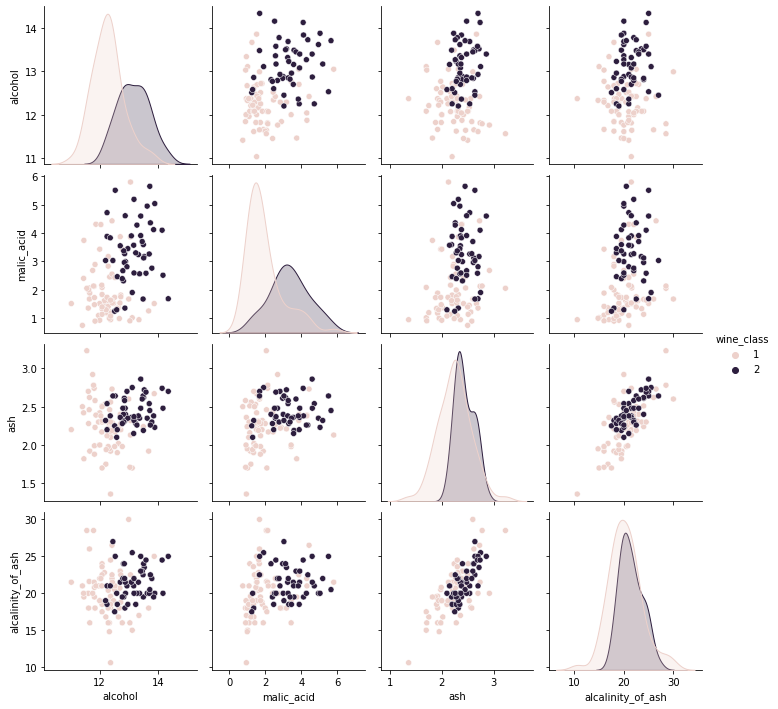

In [71]:
_df = pd.DataFrame(data=_data, columns=data.feature_names)
_df['wine_class'] = _target
wine = _df[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'wine_class']]
sns.pairplot(wine, hue='wine_class')

##### __(c) Create a training (75%) and test (25%) dataset using.__
_(Hint: use the `sklearn.model_selection.train_test_split` method and the parameter `random_state=0`)_

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(_data, _target, test_size=0.25, random_state=0)

##### __(d) Train a SVM (support vector machine) using the `sklearn.svm.SVC` and compute the accuracy on the training and test data.__
_(Hint: use the `sklearn.metrics.accuracy_score` for the accuracy)_

In [73]:
from sklearn import svm
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7

##### __(e) Normalize (min-max-normalization) each column of the DataFrame generated in (a).__
_(Hint: do not use any library other then `pandas` for this)_

In [74]:
df_minmax_norm = (df-df.min())/(df.max()-df.min())
df_minmax_norm.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.404834,0.039526,0.000000,0.000000,0.195652,0.393701,0.048523,0.283019,0.003155,0.057167,0.463415,0.227273,0.342291
1,0.392749,0.071146,0.491979,0.278351,0.336957,0.421260,0.158228,0.943396,0.000000,0.169795,0.626016,0.165289,0.568600
2,0.486405,0.122530,0.352941,0.319588,0.326087,0.409449,0.225738,0.754717,0.066246,0.381399,0.406504,0.132231,0.243281
3,0.797583,0.100791,0.299465,0.381443,0.260870,0.440945,0.305907,0.358491,0.100946,0.215017,0.609756,0.491736,0.497878
4,0.404834,0.077075,0.427807,0.432990,0.184783,0.992126,0.582278,0.113208,0.460568,0.270478,0.601626,0.661157,0.200849


##### __(f) Split the normalized data again into a training and test dataset.__ _(Hint: for the splitting use same parameters as in (c))_ 
__Train a SVM with the normalized data and compute again the accuracy for the normalized training and test data.__

In [76]:
X_mm_train, X_mm_test, y_train, y_test = train_test_split(df_minmax_norm, _target, test_size=0.25, random_state=0)
clf1 = svm.SVC(kernel='rbf', gamma='scale')
clf1.fit(X_mm_train, y_train)
y_mm_pred = clf1.predict(X_mm_test)
accuracy_score(y_test, y_mm_pred)

0.9333333333333333

##### __(g) Compare and explain the results of (d) and (f). Explain the differences in accuracy that result from normalization.__

```
The differences is significant, with higher accuracy after normalization (0.933 >> 0.7). The low accuracy happens because features are measured at different ranges of values.

The goal of normalization is to change the values of numeric columns in the dataset into a common scale. Variables that are measured at different scales do not contribute equally to the analysis and may end up with a bias. Normalization prevents this problem by equalizing the range (and/or data variability).   
``` 

---